In [24]:
import spladtool.spladtool_reverse as str
from spladtool.utils import SGD
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tqdm import tqdm, trange

(200, 2) (200,)


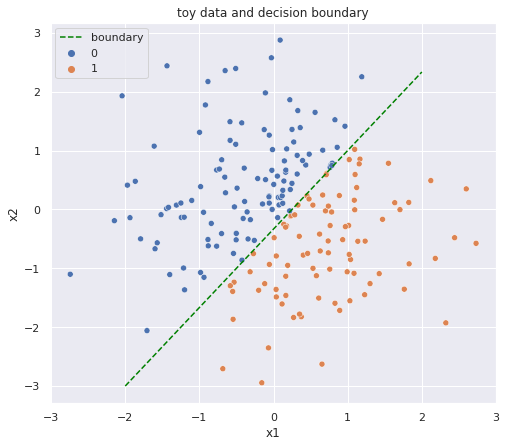

In [23]:
# We first create a toy dataset that is linear separable
# We chose a simple classification model with decision boundary being 4x1 - 3x2 > 1
x = np.random.randn(200, 2)
y = ((4 * x[:, 0] - 3 * x[:, 1]) > 1).astype(int)
plot_df = {
    'x1': x[:, 0],
    'x2': x[:, 1],
    'y': y
}
print(x.shape, y.shape)
sns.set()
plt.figure(figsize=(8, 7))
sns.scatterplot(data=plot_df, x='x1', y='x2', hue=y)
x_plot = np.arange(-2, 3)
y_plot = (4 * x_plot - 1) / 3
sns.lineplot(x=x_plot, y=y_plot, color='green', linestyle='--', label='boundary')
plt.title('toy data and decision boundary')
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 632.52it/s]


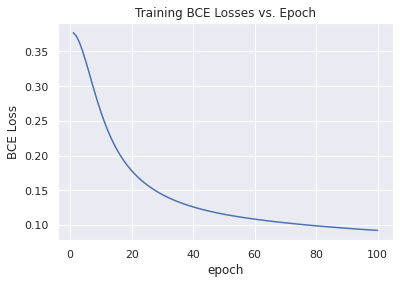

In [36]:
# define a simple logistic regression model
np.random.seed(42)

class MyModel(str.Module):
    def __init__(self):
        super().__init__()
        self.register_param(w1=str.tensor(np.random.randn()))
        self.register_param(w2=str.tensor(np.random.randn()))
        self.register_param(b=str.tensor(np.random.randn()))
    
    def forward(self, x):
        w1 = self.params['w1'].repeat(x.shape[0])
        w2 = self.params['w2'].repeat(x.shape[0])
        b = self.params['b'].repeat(x.shape[0])
        y = w1 * str.tensor(x[:, 0]) + w2 * str.tensor(x[:, 1]) + b
        return y

    
# define loss function and optimizer
model = MyModel()
criterion = str.BCELoss()
opt = SGD(model.parameters(), lr=0.1, momentum=0.9)

# training using SGD with momentum
losses = []
for epoch in trange(100):
    outputs = model(x)
    targets = str.tensor(y.astype(float))
    loss = criterion(targets, outputs)
    opt.zero_grad()
    loss.backward()
    opt.step()
    losses.append(float(loss.data))

loss_df = {
    'epoch': np.arange(1, 101),
    'BCE Loss': losses
}

sns.lineplot(data=loss_df, x='epoch', y='BCE Loss')
plt.title('Training BCE Losses vs. Epoch')
plt.show()

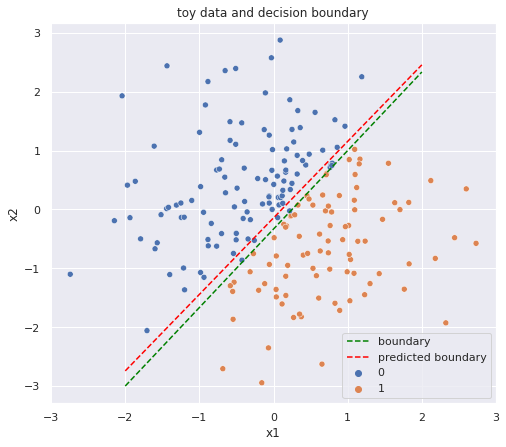

In [37]:
plot_df = {
    'x1': x[:, 0],
    'x2': x[:, 1],
    'y': y
}

w1 = float(model.params['w1'].data)
w2 = float(model.params['w2'].data)
b = float(model.params['b'].data)

sns.set()
plt.figure(figsize=(8, 7))
sns.scatterplot(data=plot_df, x='x1', y='x2', hue=y)
x_plot = np.arange(-2, 3)
y_plot = (4 * x_plot - 1) / 3
pred_plot = -(w1 * x_plot + b) / w2
sns.lineplot(x=x_plot, y=y_plot, color='green', linestyle='--', label='boundary')
sns.lineplot(x=x_plot, y=pred_plot, color='red', linestyle='--', label='predicted boundary')
plt.title('toy data and decision boundary')
plt.show()